<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/RISK_MANAGEMENT_SYSTEM_USING_AI_!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install numpy pandas matplotlib seaborn


In [31]:
!pip uninstall sklearn -y

In [32]:
!pip install scikit-learn

In [33]:
import yfinance as yf
import pandas as pd

In [34]:
ticker ='^SPX'
start_date='2010-01-01'
end_date='2025-01-01'

In [35]:
data= yf.download(ticker,start=start_date,end=end_date)
data=data[['Close']]
data.rename(columns={'Close':'Price'}, inplace=True)
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [36]:
print(data.head())

Price        Date        Price
Ticker                    ^SPX
0      2010-01-04  1132.989990
1      2010-01-05  1136.520020
2      2010-01-06  1137.140015
3      2010-01-07  1141.689941
4      2010-01-08  1144.979980


KEY RISK METRICS value at Risk(Var)

In [37]:
import numpy as np
#calculation of daily return
data['Return']=data['Price'].pct_change().dropna()
#Var calculation(95% confidence level)
confidence_level=0.95
var=np.percentile(data['Return'].dropna(), (1-confidence_level)*100)

#expected shortfall(ES)
es = data['Return'][data['Return'] <= var].mean()

print(f"VaR(95%):{var*100:.2f}%")
print(f"Expected shortfall (ES):{es*100:.2f}%")

VaR(95%):-1.65%
Expected shortfall (ES):-2.64%


LSTM Model(risk prediction)

In [38]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#scale data
scaler=MinMaxScaler(feature_range=(0,1))
data['Scaled_price']=scaler.fit_transform(data[['Price']])

In [39]:
#sequences creation
def create_sequences(data, window_size=60):
    sequences=[]
    for i in range(len(data)-window_size):
        seq = data[i:i+window_size]
        lebel= data[i+window_size]
        sequences.append((seq, lebel))
    return sequences

In [40]:
#data for LSTM
window_size=60
sequences=create_sequences(data['Scaled_price'].values, window_size)

x= np.array([seq[0] for seq in sequences])
y=np.array([seq[1] for seq in sequences])
x=x.reshape(x.shape[0], x.shape[1], 1)

LSTM MODEL BUILDING

In [41]:
model = Sequential([LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)),
LSTM(50), Dense(1)])
model.compile(optimizer='adam', loss='mse')
#model training
model.fit(x, y, epochs=10, batch_size=32)

#prediction of next day prices
predicted=model.predict(x[-1].reshape(1,window_size,1))
predicted_price=scaler.inverse_transform(predicted)
print(f"Predicted price for the next day:{predicted_price[0][0]:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.0229
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 2.1183e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 2.1406e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.0175e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 2.6129e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 2.1558e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.6403e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 1.5174e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.6910e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 1.9453e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Predicted price for the next day:5948.22


STRESS TESTING(MONTE CARLO)

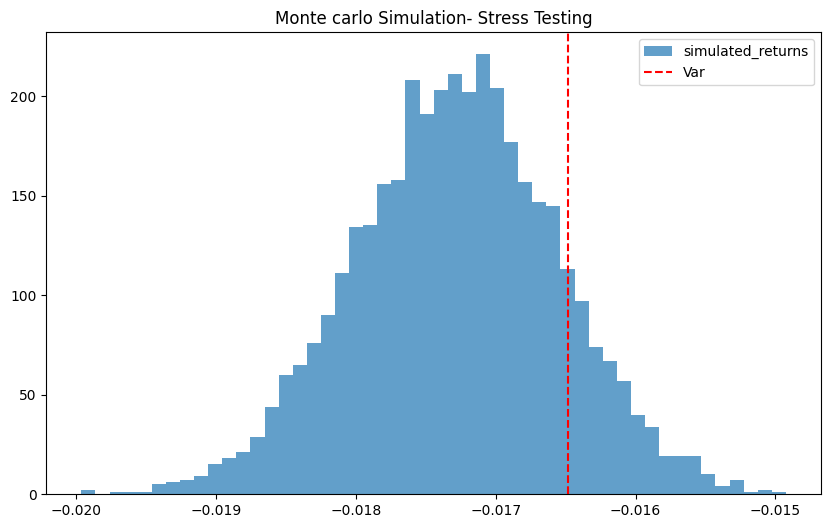

In [42]:
simulations =1000
simulated_returns=[]
#returns simulations

for _ in range(simulations):
    simulated_returns.append(np.random.normal(data['Return'].mean(), data['Return'].std(), len(data['Return'])))
simulated_returns=np.array(simulated_returns)
percentiles_5=np.percentile(simulated_returns, 5, axis=0)

#ploting results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(percentiles_5, bins=50, alpha=0.7, label='simulated_returns')
plt.axvline(var, color='r', linestyle='dashed', label='Var')
plt.legend()
#plt.xlabel('Returns')
#plt.ylabel('Frequency')
plt.title('Monte carlo Simulation- Stress Testing')
plt.show()

In [44]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [45]:
import streamlit as st
st.title('AI-powered Risk management System')
st.write(f"Value at risk(95%): {var*100:.2f}%")
st.write(f"Expected Shortfall(ES): {es*100:.2f}%")
st.line_chart(data.set_index('Date')['Price'])


2025-01-21 07:19:26.999 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.506 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-21 07:19:27.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 07:19:27.543 Thread 'MainThread': mi

DeltaGenerator()